In [60]:
import pandas as pd
import os
import re
from unidecode import unidecode

In [61]:
# Show all columns
pd.set_option('display.max_columns', None)

In [62]:
path = '/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/Files'

In [63]:
files = []
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        files.append(file)
files.sort()
files

['obras_abr_2023.xlsx',
 'obras_abr_2024.xlsx',
 'obras_abr_2025.xlsx',
 'obras_ago_2022.xlsx']

In [64]:
files[2]

'obras_abr_2025.xlsx'

In [65]:
# opening the dfs
df_2025 = pd.read_excel(f'/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/Files/{files[2]}')
df_2024 = pd.read_excel(f'/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/Files/{files[1]}')
df_2023 = pd.read_excel(f'/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/Files/{files[0]}')
df_2022 = pd.read_excel(f'/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/Files/{files[3]}')

In [66]:
# cleaning the names of the projects and the names of the cities
def clean_name(name):
    if pd.isna(name):
        return None
    
    # Convert to string, lowercase, strip spaces
    name = str(name).lower().strip()

    # Remove accents
    name = unidecode(name)

    # Remove special characters: keep only letters, numbers, spaces
    name = re.sub(r'[^\w\s]', '', name)

    # Remove extra spaces
    name = re.sub(r'\s+', ' ', name)

    # Final check: return cleaned name or None
    return name if name != '' and name != 'nan' else None

# project's names
df_2025['Empreendimento'] = df_2025['Empreendimento'].apply(clean_name)
df_2024['Empreendimento'] = df_2024['Empreendimento'].apply(clean_name)
df_2023['Empreendimento'] = df_2023['Empreendimento'].apply(clean_name)
df_2022['Empreendimento'] = df_2022['Empreendimento'].apply(clean_name)

def clean_name2(name):
    if pd.isna(name):
        return None
    
    # Convert to string, lowercase, strip spaces
    name = str(name).lower().strip()

    # Remove accents
    name = unidecode(name)

    # Final check: return cleaned name or None
    return name if name != '' and name != 'nan' else None

# names of cities
df_2025['Município/UF'] = df_2025['Município/UF'].apply(clean_name2)
df_2024['Município/UF'] = df_2024['Município/UF'].apply(clean_name2)
df_2023['Município/UF'] = df_2023['Município/UF'].apply(clean_name2)
df_2022['Município/UF'] = df_2022['Município/UF'].apply(clean_name2)

In [67]:
df_2025.head()

,Data base,Base de dados,Núm. Instrumento,Empreendimento,Município/UF,Situação,Exec. física,Exec. financeira,Valor Investimento,Valor Desbloqueado,Causa da paralisação,Repassador,Setor,ID
0,2025-04-01,CAIXA,676829,corredor de onibus salvador bahia vias estrutu...,salvador/ba,Em execução,0.9860,0.842600,1.224814e+09,8.365133e+08,NaN,Ministério das Cidades,Infraestrutura E Mobilidade Urbana,CAIXA-421239
1,2025-04-01,CAIXA,621904,5340 unidades habitacionais novas e 44343 unid...,sao paulo/sp,Em execução,0.7031,0.878900,1.077518e+09,3.915243e+08,NaN,Ministério das Cidades,Habitação,CAIXA-227535
2,2025-04-01,CAIXA,678533,implantacao da linha leste do metro de fortale...,fortaleza/ce,Em execução,0.0849,0.117100,6.730000e+08,7.741123e+07,NaN,Ministério das Cidades,Infraestrutura E Mobilidade Urbana,CAIXA-409099
3,2025-04-01,DNIT,16 00614/2013,execucao das obras de duplicacao da rodovia br...,sc,Em execução,NaN,0.772340,5.357443e+08,4.137769e+08,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-7411
4,2025-04-01,DNIT,00 00817/2013,contratacao de empresa para elaboracao dos pro...,mg,Paralisada,NaN,1.006972,5.300000e+08,5.336954e+08,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-7423


In [68]:
df_2025.shape

(22607, 14)

In [69]:
df_2025.columns

Index(['Data base', 'Base de dados', 'Núm. Instrumento', 'Empreendimento',
       'Município/UF', 'Situação', 'Exec. física', 'Exec. financeira',
       'Valor Investimento', 'Valor Desbloqueado', 'Causa da paralisação',
       'Repassador', 'Setor', 'ID'],
      dtype='object')

In [70]:
df_2025[df_2025['Situação'] == 'Paralisada'].loc[df_2025['Empreendimento'].str.contains('rodovia', case=False, na=False)]

,Data base,Base de dados,Núm. Instrumento,Empreendimento,Município/UF,Situação,Exec. física,Exec. financeira,Valor Investimento,Valor Desbloqueado,Causa da paralisação,Repassador,Setor,ID
4,2025-04-01,DNIT,00 00817/2013,contratacao de empresa para elaboracao dos pro...,mg,Paralisada,NaN,1.006972,5.300000e+08,5.336954e+08,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-7423
24,2025-04-01,DNIT,NaN,execucao dos servicos de elaboracao do projeto...,pr,Paralisada,NaN,0.999583,3.065000e+08,3.063720e+08,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-7864
25,2025-04-01,DNIT,16 00967/2014,execucao das obras de duplicacao da rodovia in...,sc,Paralisada,NaN,0.233153,3.049980e+08,7.111110e+07,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-7933
28,2025-04-01,DNIT,NaN,elaboracao dos projetos basico e executivo de ...,ba,Paralisada,NaN,0.885807,2.970000e+08,2.630848e+08,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-8058
50,2025-04-01,DNIT,NaN,contratacao integrada de empresa para a presta...,pa,Paralisada,NaN,0.813989,2.293884e+08,1.867196e+08,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-7258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2025-04-01,DNIT,06 00457/2024,execucao dos servicos necessarios de recuperac...,mg,Paralisada,NaN,0.906084,4.998423e+05,4.528989e+05,NaN,Departamento Nacional de Infraestrutura de Tra...,Transportes,DNIT-11538
14778,2025-04-01,CAIXA,940613,construcao do terminal rodoviario do municipio...,lavras da mangabeira/ce,Paralisada,0.2011,0.176200,4.868772e+05,8.477462e+04,Dificuldade técnica da empresa executora,Ministério do Turismo,Turismo,CAIXA-1086563
14982,2025-04-01,CAIXA,934391,construcao do terminal rodoviario do municipio...,lavras da mangabeira/ce,Paralisada,0.1839,0.165300,4.816040e+05,7.954201e+04,Dificuldade técnica da empresa executora,Ministério do Turismo,Turismo,CAIXA-1084241
15045,2025-04-01,CAIXA,894287,construcao do terminal rodoviario no municipio...,novo jardim/to,Paralisada,0.0000,0.029700,4.800000e+05,1.416535e+04,Dificuldade técnica do tomador,Ministério do Turismo,Turismo,CAIXA-1068950


In [71]:
df_2024.shape

(22961, 14)

In [72]:
df_2023.shape

(21005, 14)

In [73]:
df_2022.shape

(22559, 14)

In [74]:
# merging types
merge1 = df_2025.merge(df_2024, left_on = ['ID', 'Município/UF'], right_on = ['ID', 'Município/UF'], how ='outer', suffixes=('_2025', '_2024'))

In [75]:
merge1.shape

(29469, 26)

In [76]:
# merging another df
merge2 = df_2023.merge(df_2022, left_on = ['ID', 'Município/UF'], right_on = ['ID', 'Município/UF'], how ='outer', suffixes=('_2023', '_2022'))

In [77]:
merge2.shape

(31894, 26)

In [78]:
# merging the last df
df = merge1.merge(merge2, left_on = ['ID', 'Município/UF'], right_on = ['ID', 'Município/UF'], how='outer')

In [79]:
df.shape

(47301, 50)

In [80]:
df.head()

,Data base_2025,Base de dados_2025,Núm. Instrumento_2025,Empreendimento_2025,Município/UF,Situação_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Repassador_2025,Setor_2025,ID,Data base_2024,Base de dados_2024,Núm. Instrumento_2024,Empreendimento_2024,Situação_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Repassador_2024,Setor_2024,Data base_2023,Base de dados_2023,Núm. Instrumento_2023,Empreendimento_2023,Situação_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Repassador_2023,Setor_2023,Data base_2022,Base de dados_2022,Núm. Instrumento_2022,Empreendimento_2022,Situação_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Repassador_2022,Setor_2022
0,NaT,NaN,NaN,NaN,guia lopes da laguna/ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-1000006,2024-04-01,CAIXA,777879,construcao de praca de eventos sera na rua vis...,Paralisada,1.0,0.8503,1010450.2,829042.67,Dificuldade técnica da empresa executora,Ministério do Turismo,Turismo,2023-04-01,CAIXA,777879,construcao de praca de eventos sera na rua vis...,Em execução,0.7436,0.4005,1010450.2,390533.82,NaN,Ministério do Turismo,Turismo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,guia lopes da laguna/ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-100000690,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01,CAIXA,777879.0,construcao de praca de eventos sera na rua vis...,Paralisada,0.5245,0.5285,1010450.2,515255.49,Não informado,Ministério do Turismo,Turismo
2,NaT,NaN,NaN,NaN,mirante/ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-1000079,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,CAIXA,777298,construcao da arena multiuso antonio sena de c...,Paralisada,0.4975,0.1689,800000.0,129139.96,Dificuldade técnica do tomador,Ministério do Turismo,Turismo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,mirante/ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-100007923,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01,CAIXA,777298.0,construcao da arena multiuso antonio sena de c...,Paralisada,0.4115,0.3541,800000.0,270817.93,Dificuldade técnica do tomador,Ministério do Turismo,Turismo
4,NaT,NaN,NaN,NaN,manaus/am,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-1000108,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,CAIXA,777550,projetos e obras de acessibilidade 1a etapa,Em execução,0.5344,0.0837,5787310.9,435781.56,NaN,Ministério do Turismo,Turismo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# creating another column for the states
df['UF'] = df['Município/UF'].astype(str).apply(lambda x: x.split('/')[-1] if '/' in x else x)

In [82]:
df.head()

,Data base_2025,Base de dados_2025,Núm. Instrumento_2025,Empreendimento_2025,Município/UF,Situação_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Repassador_2025,Setor_2025,ID,Data base_2024,Base de dados_2024,Núm. Instrumento_2024,Empreendimento_2024,Situação_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Repassador_2024,Setor_2024,Data base_2023,Base de dados_2023,Núm. Instrumento_2023,Empreendimento_2023,Situação_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Repassador_2023,Setor_2023,Data base_2022,Base de dados_2022,Núm. Instrumento_2022,Empreendimento_2022,Situação_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Repassador_2022,Setor_2022,UF
0,NaT,NaN,NaN,NaN,guia lopes da laguna/ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-1000006,2024-04-01,CAIXA,777879,construcao de praca de eventos sera na rua vis...,Paralisada,1.0,0.8503,1010450.2,829042.67,Dificuldade técnica da empresa executora,Ministério do Turismo,Turismo,2023-04-01,CAIXA,777879,construcao de praca de eventos sera na rua vis...,Em execução,0.7436,0.4005,1010450.2,390533.82,NaN,Ministério do Turismo,Turismo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ms
1,NaT,NaN,NaN,NaN,guia lopes da laguna/ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-100000690,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01,CAIXA,777879.0,construcao de praca de eventos sera na rua vis...,Paralisada,0.5245,0.5285,1010450.2,515255.49,Não informado,Ministério do Turismo,Turismo,ms
2,NaT,NaN,NaN,NaN,mirante/ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-1000079,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,CAIXA,777298,construcao da arena multiuso antonio sena de c...,Paralisada,0.4975,0.1689,800000.0,129139.96,Dificuldade técnica do tomador,Ministério do Turismo,Turismo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba
3,NaT,NaN,NaN,NaN,mirante/ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-100007923,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01,CAIXA,777298.0,construcao da arena multiuso antonio sena de c...,Paralisada,0.4115,0.3541,800000.0,270817.93,Dificuldade técnica do tomador,Ministério do Turismo,Turismo,ba
4,NaT,NaN,NaN,NaN,manaus/am,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA-1000108,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,CAIXA,777550,projetos e obras de acessibilidade 1a etapa,Em execução,0.5344,0.0837,5787310.9,435781.56,NaN,Ministério do Turismo,Turismo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,am


In [83]:
len(df['UF'].unique())

28

In [84]:
df['UF'].loc[df['UF'].str.contains('None', case=False, na=False)].value_counts()

UF
None    1081
Name: count, dtype: int64

In [85]:
df.columns

Index(['Data base_2025', 'Base de dados_2025', 'Núm. Instrumento_2025',
       'Empreendimento_2025', 'Município/UF', 'Situação_2025',
       'Exec. física_2025', 'Exec. financeira_2025', 'Valor Investimento_2025',
       'Valor Desbloqueado_2025', 'Causa da paralisação_2025',
       'Repassador_2025', 'Setor_2025', 'ID', 'Data base_2024',
       'Base de dados_2024', 'Núm. Instrumento_2024', 'Empreendimento_2024',
       'Situação_2024', 'Exec. física_2024', 'Exec. financeira_2024',
       'Valor Investimento_2024', 'Valor Desbloqueado_2024',
       'Causa da paralisação_2024', 'Repassador_2024', 'Setor_2024',
       'Data base_2023', 'Base de dados_2023', 'Núm. Instrumento_2023',
       'Empreendimento_2023', 'Situação_2023', 'Exec. física_2023',
       'Exec. financeira_2023', 'Valor Investimento_2023',
       'Valor Desbloqueado_2023', 'Causa da paralisação_2023',
       'Repassador_2023', 'Setor_2023', 'Data base_2022', 'Base de dados_2022',
       'Núm. Instrumento_2022', 'Empree

In [86]:
# what causes the project's paralysis
df['Causa da paralisação_2025'].value_counts()

Causa da paralisação_2025
Dificuldade técnica do tomador                                                                                                                                                                           941
Dificuldade técnica da empresa executora                                                                                                                                                                 674
Contrato Rescindido                                                                                                                                                                                      611
Outros                                                                                                                                                                                                   461
Abandono da empresa                                                                                                                                       

In [30]:
df['Causa da paralisação_2024'].value_counts()

Causa da paralisação_2024
Dificuldade técnica do tomador                                                             1032
Contrato Rescindido                                                                         634
Dificuldade técnica da empresa executora                                                    628
Abandono da empresa                                                                         497
Outros                                                                                      491
Fato ou evento não previsto                                                                 318
Discricionariedade do Gestor Público (Tomador)                                              261
Irregularidades na gestão anterior                                                          137
Discricionariedade do Gestor do Programa (Ministério)                                       112
Dificuldade financeira da empresa executora                                                 110
Medidas Admini

In [31]:
df['Causa da paralisação_2023'].value_counts()

Causa da paralisação_2023
Dificuldade técnica do tomador                        1708
Contrato Rescindido                                    659
Dificuldade técnica da empresa executora               591
Discricionariedade do gestor público                   518
Abandono da empresa                                    462
                                                      ... 
Município não recebeu o repasse do governo federal       1
Judicial, DESVIO DO RECURSO EXISTENTE EM CONTA           1
Orçamentário/Financeiro, Mudança de gestão               1
Órgãos de Controle, atraso no processo licitatório       1
Orçamentário/Financeiro, crise causada pelo covid        1
Name: count, Length: 90, dtype: int64

In [87]:
df['Causa da paralisação_2022'].value_counts()

Causa da paralisação_2022
Dificuldade técnica do tomador                                                   2046
Contrato Rescindido                                                               737
Discricionariedade do gestor público                                              585
Dificuldade técnica da empresa executora                                          481
Abandono da empresa                                                               450
                                                                                 ... 
Orçamentário/Financeiro, Mudança de gestão                                          1
Problema de saúde Pública                                                           1
Mudança de gestão, Rescisão do contrato pela administração                          1
Problemas técnicos da obra, Mudança de gestão, Limitações de projeto/técnicas       1
SOLICITAÇÃO PARA REANÁLISE DAPROPOSTA                                               1
Name: count, Length: 96, dty

In [88]:
# getting the number of halted and active projects for each year
df_long = df.melt(value_vars=['Situação_2025', 'Situação_2024', 'Situação_2023', 'Situação_2022'],
                  var_name='Ano', value_name='Situação') # melting the data

# grouping by year and situation
summary = df_long.groupby(['Ano', 'Situação']).size().unstack(fill_value=0)
summary

# renaming the years
summary.index = summary.index.str.replace('Situação_', '')
summary.index.name = 'Ano'
summary.reset_index()

Situação,Ano,Em execução,Paralisada
0,2022,13885,8674
1,2023,12402,8603
2,2024,11017,11944
3,2025,11138,11469


In [89]:
df.columns

Index(['Data base_2025', 'Base de dados_2025', 'Núm. Instrumento_2025',
       'Empreendimento_2025', 'Município/UF', 'Situação_2025',
       'Exec. física_2025', 'Exec. financeira_2025', 'Valor Investimento_2025',
       'Valor Desbloqueado_2025', 'Causa da paralisação_2025',
       'Repassador_2025', 'Setor_2025', 'ID', 'Data base_2024',
       'Base de dados_2024', 'Núm. Instrumento_2024', 'Empreendimento_2024',
       'Situação_2024', 'Exec. física_2024', 'Exec. financeira_2024',
       'Valor Investimento_2024', 'Valor Desbloqueado_2024',
       'Causa da paralisação_2024', 'Repassador_2024', 'Setor_2024',
       'Data base_2023', 'Base de dados_2023', 'Núm. Instrumento_2023',
       'Empreendimento_2023', 'Situação_2023', 'Exec. física_2023',
       'Exec. financeira_2023', 'Valor Investimento_2023',
       'Valor Desbloqueado_2023', 'Causa da paralisação_2023',
       'Repassador_2023', 'Setor_2023', 'Data base_2022', 'Base de dados_2022',
       'Núm. Instrumento_2022', 'Empree

In [90]:
# getting the number of halted and active projects by states
projects_2025 = df.groupby('UF')['Situação_2025'].value_counts().unstack(fill_value=0).reset_index()

In [91]:
# creating two new columns with the percentages of each one
projects_2025['percentage_p'] = projects_2025['Paralisada']/(projects_2025['Em execução']+projects_2025['Paralisada'])
projects_2025['percentage_e'] = projects_2025['Em execução']/(projects_2025['Em execução']+projects_2025['Paralisada'])
projects_2025

Situação_2025,UF,Em execução,Paralisada,percentage_p,percentage_e
0,ac,133,152,0.533333,0.466667
1,al,257,256,0.499025,0.500975
2,am,296,438,0.596730,0.403270
3,ap,121,152,0.556777,0.443223
4,ba,844,926,0.523164,0.476836
5,ce,749,657,0.467283,0.532717
6,df,79,21,0.210000,0.790000
7,es,183,131,0.417197,0.582803
8,go,411,424,0.507784,0.492216
9,ma,854,1225,0.589226,0.410774


In [92]:
# opening HDI dataframe
hdi = pd.read_excel("hdi.xlsx")

In [93]:
hdi.head()

,Territorialidade,Posição IDHM,IDHM,Posição IDHM Renda,IDHM Renda,Posição IDHM Educação,IDHM Educação,Posição IDHM Longevidade,IDHM Longevidade
0,Distrito Federal,1,0.814,1,0.821,2,0.817,6,0.803
1,São Paulo,2,0.806,2,0.771,1,0.839,5,0.810
2,Santa Catarina,3,0.792,4,0.759,3,0.790,3,0.827
3,Minas Gerais,4,0.774,9,0.718,7,0.762,2,0.846
4,Rio Grande do Sul,5,0.771,3,0.767,10,0.750,7,0.797


In [94]:
# creating a new column to merge
uf_dict = {
    'Acre': 'ac', 'Alagoas': 'al', 'Amapá': 'ap', 'Amazonas': 'am', 'Bahia': 'ba',
    'Ceará': 'ce', 'Distrito Federal': 'df', 'Espírito Santo': 'es', 'Goiás': 'go',
    'Maranhão': 'ma', 'Mato Grosso': 'mt', 'Mato Grosso do Sul': 'ms',
    'Minas Gerais': 'mg', 'Pará': 'pa', 'Paraíba': 'pb', 'Paraná': 'pr',
    'Pernambuco': 'pe', 'Piauí': 'pi', 'Rio de Janeiro': 'rj', 'Rio Grande do Norte': 'rn',
    'Rio Grande do Sul': 'rs', 'Rondônia': 'ro', 'Roraima': 'rr', 'Santa Catarina': 'sc',
    'São Paulo': 'sp', 'Sergipe': 'se', 'Tocantins': 'to'
}

hdi['UF'] = hdi['Territorialidade'].map(uf_dict)

In [95]:
hdi.head()

,Territorialidade,Posição IDHM,IDHM,Posição IDHM Renda,IDHM Renda,Posição IDHM Educação,IDHM Educação,Posição IDHM Longevidade,IDHM Longevidade,UF
0,Distrito Federal,1,0.814,1,0.821,2,0.817,6,0.803,df
1,São Paulo,2,0.806,2,0.771,1,0.839,5,0.810,sp
2,Santa Catarina,3,0.792,4,0.759,3,0.790,3,0.827,sc
3,Minas Gerais,4,0.774,9,0.718,7,0.762,2,0.846,mg
4,Rio Grande do Sul,5,0.771,3,0.767,10,0.750,7,0.797,rs


In [96]:
hdi = hdi[['UF', 'IDHM']] # structuring the df with fewer columns

In [97]:
hdi.head()

,UF,IDHM
0,df,0.814
1,sp,0.806
2,sc,0.792
3,mg,0.774
4,rs,0.771


In [98]:
projects_2025.columns

Index(['UF', 'Em execução', 'Paralisada', 'percentage_p', 'percentage_e'], dtype='object', name='Situação_2025')

In [99]:
hdi.columns

Index(['UF', 'IDHM'], dtype='object')

In [100]:
# merging the 2025 projects df with the hdi df
projects_2025 = projects_2025.merge(hdi, left_on='UF', right_on='UF')
projects_2025.head()

,UF,Em execução,Paralisada,percentage_p,percentage_e,IDHM
0,ac,133,152,0.533333,0.466667,0.710
1,al,257,256,0.499025,0.500975,0.684
2,am,296,438,0.596730,0.403270,0.700
3,ap,121,152,0.556777,0.443223,0.688
4,ba,844,926,0.523164,0.476836,0.691


In [101]:
# creating a new column to categorize HDI

def categorize_idhm(val):
    if val <= 0.499:
        return 'Too Low'
    elif val <= 0.599:
        return 'Low'
    elif val <= 0.699:
        return 'Medium'
    elif val <= 0.799:
        return 'High'
    else:
        return 'Very High'

if 'IDHM' in projects_2025.columns:
    projects_2025['label_hdi'] = projects_2025['IDHM'].apply(categorize_idhm)

projects_2025.head()

,UF,Em execução,Paralisada,percentage_p,percentage_e,IDHM,label_hdi
0,ac,133,152,0.533333,0.466667,0.710,High
1,al,257,256,0.499025,0.500975,0.684,Medium
2,am,296,438,0.596730,0.403270,0.700,High
3,ap,121,152,0.556777,0.443223,0.688,Medium
4,ba,844,926,0.523164,0.476836,0.691,Medium


In [102]:
# creating the bins and adding the range to another column
quantile_bins = pd.qcut(projects_2025['Paralisada'], q=5)
projects_2025['range_hp'] = quantile_bins

# creating quartiles with labels
projects_2025['label_hp'] = pd.qcut(projects_2025['Paralisada'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
projects_2025.sort_values(by=['IDHM'], ascending=False).head()

,UF,Em execução,Paralisada,percentage_p,percentage_e,IDHM,label_hdi,range_hp,label_hp
6,df,79,21,0.210000,0.790000,0.814,Very High,"(20.999, 153.8]",Very Low
25,sp,683,698,0.505431,0.494569,0.806,Very High,"(639.0, 1225.0]",Very High
23,sc,321,169,0.344898,0.655102,0.792,High,"(153.8, 233.8]",Low
10,mg,972,874,0.473456,0.526544,0.774,High,"(639.0, 1225.0]",Very High
22,rs,786,467,0.372706,0.627294,0.771,High,"(233.8, 488.6]",Medium


In [103]:
# exporting this df
projects_2025.to_csv('/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/New dfs created/projects_2025.csv', index=False)

In [104]:
# categorizing the information per each hdi label
projects_2025.groupby('range_hp')['label_hdi'].value_counts().unstack().reset_index()

/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/569129167.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  projects_2025.groupby('range_hp')['label_hdi'].value_counts().unstack().reset_index()


label_hdi,range_hp,High,Medium,Very High
0,"(20.999, 153.8]",3,2,1
1,"(153.8, 233.8]",5,0,0
2,"(233.8, 488.6]",4,1,0
3,"(488.6, 639.0]",3,2,0
4,"(639.0, 1225.0]",2,3,1


In [105]:
# Number of projects in Brazil (active and halted)
f'Brazil has {df['Situação_2025'].value_counts().sum()} projects in 2025.'

'Brazil has 22607 projects in 2025.'

In [106]:
# getting the sum of halted public projects in 2025
f'Cost of the halted projects: R$ {df[df['Situação_2025'] == 'Paralisada']['Valor Investimento_2025'].sum().round(2)}'

'Cost of the halted projects: R$ 34734166731.69'

In [107]:
# getting the average progression of projects in 2025
f'Projects are halted with an average of {df[df['Situação_2025'] == 'Paralisada']['Exec. física_2025'].mean().round(2)}% of their execution finished.'

'Projects are halted with an average of 0.44% of their execution finished.'

In [108]:
# getting the median progression of projects in 2025
f'Projects are halted with {df[df['Situação_2025'] == 'Paralisada']['Exec. física_2025'].median().round(2)}% of their execution finished.'

'Projects are halted with 0.41% of their execution finished.'

In [109]:
# getting information on how far projects progressed in 2025
frequency_h = df[df['Situação_2025'] == 'Paralisada'][['ID', 'Exec. física_2025']]
frequency_h

,ID,Exec. física_2025
28,CAIXA-1000759,0.8924
34,CAIXA-1000830,0.0985
45,CAIXA-1000891,0.2431
48,CAIXA-1000904,0.8454
53,CAIXA-1000912,0.8603
...,...,...
47294,SISMOB-97552158000114005,NaN
47295,SISMOB-97552158000114007,NaN
47296,SISMOB-97552158000114008,NaN
47297,SISMOB-97552158000114009,NaN


In [110]:
frequency_h.shape

(11469, 2)

In [111]:
# droping the rows with Nan values
frequency_h.dropna(subset=['Exec. física_2025'], how='all', inplace=True)

In [112]:
frequency_h.shape

(9376, 2)

<Axes: title={'center': 'Execution Level Before Halting'}, xlabel='Completion (%)', ylabel='Number of projects'>

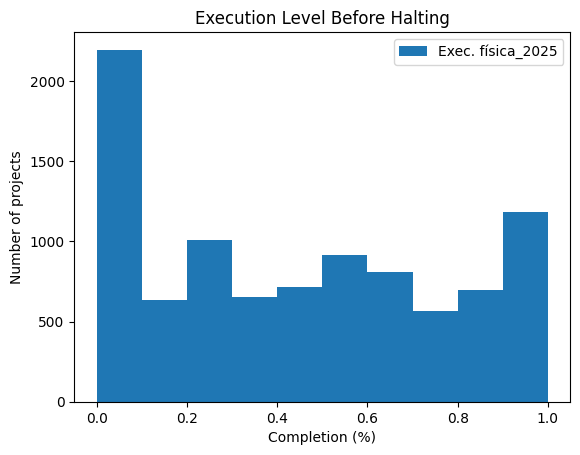

In [113]:
# ploting the frequency
frequency_h.plot(kind= 'hist',bins=10, title='Execution Level Before Halting', ylabel='Number of projects', xlabel='Completion (%)')

In [115]:
# exporting this df
frequency_h.to_csv('/Users/juliaaffonso/Documents/Julia/Lede/Projects/Project_1/New dfs created/frequency.csv', index=False)

In [116]:
# getting only the projects halted in all years
df_paralisadas = df[(df['Situação_2025'] == 'Paralisada') & (df['Situação_2024'] == 'Paralisada') & (df['Situação_2023'] == 'Paralisada') & (df['Situação_2022'] == 'Paralisada')]
df_paralisadas.shape

(3208, 51)

In [117]:
df_paralisadas.head()

,Data base_2025,Base de dados_2025,Núm. Instrumento_2025,Empreendimento_2025,Município/UF,Situação_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Repassador_2025,Setor_2025,ID,Data base_2024,Base de dados_2024,Núm. Instrumento_2024,Empreendimento_2024,Situação_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Repassador_2024,Setor_2024,Data base_2023,Base de dados_2023,Núm. Instrumento_2023,Empreendimento_2023,Situação_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Repassador_2023,Setor_2023,Data base_2022,Base de dados_2022,Núm. Instrumento_2022,Empreendimento_2022,Situação_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Repassador_2022,Setor_2022,UF
27341,2025-04-01,FUNASA,802775,melhorias sanitarias domiciliares msd tarauacaac,tarauaca/ac,Paralisada,0.0000,0.499066,681025.36,339876.64,NaN,Fundação Nacional de Saúde,Saneamento,FUNASA-AC1505141416,2024-04-01,FUNASA,802775,melhorias sanitarias domiciliares msd tarauacaac,Paralisada,0.0000,0.499066,681025.36,339876.64,NaN,Fundação Nacional de Saúde,Saneamento,2023-04-01,FUNASA,CV 0090/14,melhorias sanitarias domiciliares msd,Paralisada,NaN,NaN,681025.0,339877.0,NaN,Fundação Nacional de Saúde,Saneamento,2022-08-01,FUNASA,NaN,None,Paralisada,NaN,NaN,681025.36,339876.64,NaN,NaN,Saneamento,ac
27343,2025-04-01,FUNASA,802756,melhorias sanitarias domiciliares msd tarauacaac,tarauaca/ac,Paralisada,0.0000,0.488850,304859.34,149030.49,NaN,Fundação Nacional de Saúde,Saneamento,FUNASA-AC1505141424,2024-04-01,FUNASA,802756,melhorias sanitarias domiciliares msd tarauacaac,Paralisada,0.0000,0.488850,304859.34,149030.49,NaN,Fundação Nacional de Saúde,Saneamento,2023-04-01,FUNASA,CV 0105/14,melhorias sanitarias domiciliares msd,Paralisada,NaN,NaN,304859.0,149030.0,NaN,Fundação Nacional de Saúde,Saneamento,2022-08-01,FUNASA,NaN,None,Paralisada,NaN,NaN,304859.34,149030.49,NaN,NaN,Saneamento,ac
27346,2025-04-01,FUNASA,TC/PAC 0254/07,drenagem para controle da malaria rio brancoac,rio branco/ac,Paralisada,0.5764,0.912153,1811181.27,1652074.04,NaN,Fundação Nacional de Saúde,Saneamento,FUNASA-AC1809073328,2024-04-01,FUNASA,TC/PAC 0254/07,drenagem para controle da malaria rio brancoac,Paralisada,0.5764,0.912153,1811181.27,1652074.04,NaN,Fundação Nacional de Saúde,Saneamento,2023-04-01,FUNASA,TC/PAC 0254/07,drenagem para controle da malaria,Paralisada,NaN,NaN,1811181.0,1652074.0,NaN,Fundação Nacional de Saúde,Saneamento,2022-08-01,FUNASA,NaN,None,Paralisada,NaN,NaN,1811181.27,1652074.04,NaN,NaN,Saneamento,ac
27413,2025-04-01,FUNASA,TC/PAC 0182/08,sistema de esgotamento sanitario pariconhaal,pariconha/al,Paralisada,0.6700,0.970000,1799999.79,1745999.72,NaN,Fundação Nacional de Saúde,Saneamento,FUNASA-AL2804084354,2024-04-01,FUNASA,TC/PAC 0182/08,sistema de esgotamento sanitario pariconhaal,Paralisada,0.6760,0.970000,1799999.79,1745999.72,NaN,Fundação Nacional de Saúde,Saneamento,2023-04-01,FUNASA,TC/PAC 0182/08,sistema de esgotamento sanitario,Paralisada,NaN,NaN,1800000.0,1746000.0,NaN,Fundação Nacional de Saúde,Saneamento,2022-08-01,FUNASA,NaN,None,Paralisada,NaN,NaN,1799999.79,1745999.72,NaN,NaN,Saneamento,al
27423,2025-04-01,FUNASA,531466,melhorias sanitarias domiciliares careiroam,careiro/am,Paralisada,0.5000,0.963224,165888.30,159787.53,NaN,Fundação Nacional de Saúde,Saneamento,FUNASA-AM0103043330,2024-04-01,FUNASA,531466,melhorias sanitarias domiciliares careiroam,Paralisada,0.5000,0.963224,165888.30,159787.53,NaN,Fundação Nacional de Saúde,Saneamento,2023-04-01,FUNASA,CV 1678/04,melhorias sanitarias domiciliares,Paralisada,NaN,NaN,165888.0,0.0,NaN,Fundação Nacional de Saúde,Saneamento,2022-08-01,FUNASA,NaN,None,Paralisada,NaN,NaN,165888.30,0.00,NaN,NaN,Saneamento,am


In [118]:
# organizing the situation number
def collect_situation(row, columns):
    situations = [row[column] for column in columns if pd.notna(row[column]) and row[column] != '']
    unique_situations = sorted(set(str(situation) for situation in situations if pd.notna(situation) and str(situation).lower() != 'nan'))
    
    if not unique_situations:
        return None
    
    if len(unique_situations) == 1:
        return unique_situations[0]

    return ', '.join(unique_situations)

situations_cols = ['Situação_2025', 'Situação_2024', 'Situação_2023', 'Situação_2022']
df_paralisadas['Situação'] = df_paralisadas.apply(lambda row: collect_situation(row, situations_cols), axis=1)
df_paralisadas.drop(situations_cols, axis=1, inplace=True) # droping the remaining columns

/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/1903957774.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas['Situação'] = df_paralisadas.apply(lambda row: collect_situation(row, situations_cols), axis=1)
/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/1903957774.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas.drop(situations_cols, axis=1, inplace=True) # droping the remaining columns


In [119]:
df_paralisadas['Situação'].unique()

array(['Paralisada'], dtype=object)

In [120]:
# organizing the sector column
def collect_sector(row, columns):
    # Collect non-null, non-empty sectors values
    sectors = [row[column] for column in columns if pd.notna(row[column]) and row[column] != '']
    # Get unique sectors
    unique_sectors = sorted(set(str(sector) for sector in sectors if pd.notna(sector) and str(sector).lower() != 'nan'))
    
    if not unique_sectors:
        return None  # no sector info at all
    
    if len(unique_sectors) == 1:
        return unique_sectors[0]  # only one sector found
    
    # Multiple different sectors found, join them as a string
    return ', '.join(unique_sectors)

sectors_cols = ['Setor_2025', 'Setor_2024', 'Setor_2023', 'Setor_2022']
df_paralisadas['Setor'] = df_paralisadas.apply(lambda row: collect_sector(row, sectors_cols), axis=1)
df_paralisadas.drop(sectors_cols, axis=1, inplace=True) # droping the remaining columns

/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/1014472829.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas['Setor'] = df_paralisadas.apply(lambda row: collect_sector(row, sectors_cols), axis=1)
/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/1014472829.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas.drop(sectors_cols, axis=1, inplace=True) # droping the remaining columns


In [121]:
df_paralisadas['Setor'].unique()

array(['Saneamento', 'Educação, Educação superior',
       'Educação, Educação profissional e tecnológica',
       'Educação, Educação básica',
       'Educação, Educação (Hospitais e Inst. Militares)', 'Saúde'],
      dtype=object)

In [122]:
# organizing the origin column
def collect_origin(row, columns):
    # Collect non-null, non-empty origins values
    origins = [row[column] for column in columns if pd.notna(row[column]) and row[column] != '']
    # Get unique origins
    unique_origins = sorted(set(str(origin) for origin in origins if pd.notna(origin) and str(origin).lower() != 'nan'))
    
    if not unique_origins:
        return None  # no UF info at all
    
    if len(unique_origins) == 1:
        return unique_origins[0]  # only one origin found
    
    # Multiple different origins found, join them as a string
    return ', '.join(unique_origins)

origins_cols = ['Base de dados_2025', 'Base de dados_2024', 'Base de dados_2023', 'Base de dados_2022']
df_paralisadas['Base_de_dados'] = df_paralisadas.apply(lambda row: collect_origin(row, origins_cols), axis=1)
df_paralisadas.drop(origins_cols, axis=1, inplace=True) # droping remaining columns

/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/1369483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas['Base_de_dados'] = df_paralisadas.apply(lambda row: collect_origin(row, origins_cols), axis=1)
/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/1369483883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas.drop(origins_cols, axis=1, inplace=True) # droping remaining columns


In [123]:
# droping more columns
df_paralisadas.drop(['Data base_2025', 'Data base_2024','Data base_2023', 'Data base_2022'], axis=1, inplace=True)

/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/3766954704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas.drop(['Data base_2025', 'Data base_2024','Data base_2023', 'Data base_2022'], axis=1, inplace=True)


In [124]:
# organizing the money transferor's name column
def collect_repassador(row, columns):
    repassador = [row[column] for column in columns if pd.notna(row[column]) and row[column] != '']
    unique_repassador = sorted(set(str(repass) for repass in repassador if pd.notna(repass) and str(repass).lower() != 'nan'))
    
    if not unique_repassador:
        return None
    
    if len(unique_repassador) == 1:
        return unique_repassador[0]

    return ', '.join(unique_repassador)

repassador_cols = ['Repassador_2025', 'Repassador_2024', 'Repassador_2023', 'Repassador_2022']
df_paralisadas['Repassador'] = df_paralisadas.apply(lambda row: collect_repassador(row, repassador_cols), axis=1)
df_paralisadas.drop(repassador_cols, axis=1, inplace=True) # droping remaining columns

/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/4152821332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas['Repassador'] = df_paralisadas.apply(lambda row: collect_repassador(row, repassador_cols), axis=1)
/var/folders/99/twm49rw541v4df2dqscmdd5m0000gn/T/ipykernel_42480/4152821332.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paralisadas.drop(repassador_cols, axis=1, inplace=True) # droping remaining columns


In [125]:
df_paralisadas.head()

,Núm. Instrumento_2025,Empreendimento_2025,Município/UF,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,ID,Núm. Instrumento_2024,Empreendimento_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Núm. Instrumento_2023,Empreendimento_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Núm. Instrumento_2022,Empreendimento_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,UF,Situação,Setor,Base_de_dados,Repassador
27341,802775,melhorias sanitarias domiciliares msd tarauacaac,tarauaca/ac,0.0000,0.499066,681025.36,339876.64,NaN,FUNASA-AC1505141416,802775,melhorias sanitarias domiciliares msd tarauacaac,0.0000,0.499066,681025.36,339876.64,NaN,CV 0090/14,melhorias sanitarias domiciliares msd,NaN,NaN,681025.0,339877.0,NaN,NaN,None,NaN,NaN,681025.36,339876.64,NaN,ac,Paralisada,Saneamento,FUNASA,Fundação Nacional de Saúde
27343,802756,melhorias sanitarias domiciliares msd tarauacaac,tarauaca/ac,0.0000,0.488850,304859.34,149030.49,NaN,FUNASA-AC1505141424,802756,melhorias sanitarias domiciliares msd tarauacaac,0.0000,0.488850,304859.34,149030.49,NaN,CV 0105/14,melhorias sanitarias domiciliares msd,NaN,NaN,304859.0,149030.0,NaN,NaN,None,NaN,NaN,304859.34,149030.49,NaN,ac,Paralisada,Saneamento,FUNASA,Fundação Nacional de Saúde
27346,TC/PAC 0254/07,drenagem para controle da malaria rio brancoac,rio branco/ac,0.5764,0.912153,1811181.27,1652074.04,NaN,FUNASA-AC1809073328,TC/PAC 0254/07,drenagem para controle da malaria rio brancoac,0.5764,0.912153,1811181.27,1652074.04,NaN,TC/PAC 0254/07,drenagem para controle da malaria,NaN,NaN,1811181.0,1652074.0,NaN,NaN,None,NaN,NaN,1811181.27,1652074.04,NaN,ac,Paralisada,Saneamento,FUNASA,Fundação Nacional de Saúde
27413,TC/PAC 0182/08,sistema de esgotamento sanitario pariconhaal,pariconha/al,0.6700,0.970000,1799999.79,1745999.72,NaN,FUNASA-AL2804084354,TC/PAC 0182/08,sistema de esgotamento sanitario pariconhaal,0.6760,0.970000,1799999.79,1745999.72,NaN,TC/PAC 0182/08,sistema de esgotamento sanitario,NaN,NaN,1800000.0,1746000.0,NaN,NaN,None,NaN,NaN,1799999.79,1745999.72,NaN,al,Paralisada,Saneamento,FUNASA,Fundação Nacional de Saúde
27423,531466,melhorias sanitarias domiciliares careiroam,careiro/am,0.5000,0.963224,165888.30,159787.53,NaN,FUNASA-AM0103043330,531466,melhorias sanitarias domiciliares careiroam,0.5000,0.963224,165888.30,159787.53,NaN,CV 1678/04,melhorias sanitarias domiciliares,NaN,NaN,165888.0,0.0,NaN,NaN,None,NaN,NaN,165888.30,0.00,NaN,am,Paralisada,Saneamento,FUNASA,Fundação Nacional de Saúde


In [126]:
df_paralisadas.columns

Index(['Núm. Instrumento_2025', 'Empreendimento_2025', 'Município/UF',
       'Exec. física_2025', 'Exec. financeira_2025', 'Valor Investimento_2025',
       'Valor Desbloqueado_2025', 'Causa da paralisação_2025', 'ID',
       'Núm. Instrumento_2024', 'Empreendimento_2024', 'Exec. física_2024',
       'Exec. financeira_2024', 'Valor Investimento_2024',
       'Valor Desbloqueado_2024', 'Causa da paralisação_2024',
       'Núm. Instrumento_2023', 'Empreendimento_2023', 'Exec. física_2023',
       'Exec. financeira_2023', 'Valor Investimento_2023',
       'Valor Desbloqueado_2023', 'Causa da paralisação_2023',
       'Núm. Instrumento_2022', 'Empreendimento_2022', 'Exec. física_2022',
       'Exec. financeira_2022', 'Valor Investimento_2022',
       'Valor Desbloqueado_2022', 'Causa da paralisação_2022', 'UF',
       'Situação', 'Setor', 'Base_de_dados', 'Repassador'],
      dtype='object')

In [127]:
# organizing the order of the columns
new_order = ['ID', 'Empreendimento_2025', 'Município/UF', 'UF',
       'Situação', 'Núm. Instrumento_2025',
       'Exec. física_2025', 'Exec. financeira_2025', 'Valor Investimento_2025',
       'Valor Desbloqueado_2025', 'Causa da paralisação_2025',
        'Empreendimento_2024', 'Núm. Instrumento_2024', 'Exec. física_2024',
       'Exec. financeira_2024', 'Valor Investimento_2024',
       'Valor Desbloqueado_2024', 'Causa da paralisação_2024',
       'Empreendimento_2023', 'Núm. Instrumento_2023', 'Exec. física_2023',
       'Exec. financeira_2023', 'Valor Investimento_2023',
       'Valor Desbloqueado_2023', 'Causa da paralisação_2023',
      'Empreendimento_2022', 'Núm. Instrumento_2022', 'Exec. física_2022',
       'Exec. financeira_2022', 'Valor Investimento_2022',
       'Valor Desbloqueado_2022', 'Causa da paralisação_2022', 'Setor', 'Base_de_dados', 'Repassador']
df_paralisadas = df_paralisadas[new_order]

In [128]:
df_paralisadas.head()

,ID,Empreendimento_2025,Município/UF,UF,Situação,Núm. Instrumento_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Empreendimento_2024,Núm. Instrumento_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Empreendimento_2023,Núm. Instrumento_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Empreendimento_2022,Núm. Instrumento_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Setor,Base_de_dados,Repassador
27341,FUNASA-AC1505141416,melhorias sanitarias domiciliares msd tarauacaac,tarauaca/ac,ac,Paralisada,802775,0.0000,0.499066,681025.36,339876.64,NaN,melhorias sanitarias domiciliares msd tarauacaac,802775,0.0000,0.499066,681025.36,339876.64,NaN,melhorias sanitarias domiciliares msd,CV 0090/14,NaN,NaN,681025.0,339877.0,NaN,None,NaN,NaN,NaN,681025.36,339876.64,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde
27343,FUNASA-AC1505141424,melhorias sanitarias domiciliares msd tarauacaac,tarauaca/ac,ac,Paralisada,802756,0.0000,0.488850,304859.34,149030.49,NaN,melhorias sanitarias domiciliares msd tarauacaac,802756,0.0000,0.488850,304859.34,149030.49,NaN,melhorias sanitarias domiciliares msd,CV 0105/14,NaN,NaN,304859.0,149030.0,NaN,None,NaN,NaN,NaN,304859.34,149030.49,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde
27346,FUNASA-AC1809073328,drenagem para controle da malaria rio brancoac,rio branco/ac,ac,Paralisada,TC/PAC 0254/07,0.5764,0.912153,1811181.27,1652074.04,NaN,drenagem para controle da malaria rio brancoac,TC/PAC 0254/07,0.5764,0.912153,1811181.27,1652074.04,NaN,drenagem para controle da malaria,TC/PAC 0254/07,NaN,NaN,1811181.0,1652074.0,NaN,None,NaN,NaN,NaN,1811181.27,1652074.04,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde
27413,FUNASA-AL2804084354,sistema de esgotamento sanitario pariconhaal,pariconha/al,al,Paralisada,TC/PAC 0182/08,0.6700,0.970000,1799999.79,1745999.72,NaN,sistema de esgotamento sanitario pariconhaal,TC/PAC 0182/08,0.6760,0.970000,1799999.79,1745999.72,NaN,sistema de esgotamento sanitario,TC/PAC 0182/08,NaN,NaN,1800000.0,1746000.0,NaN,None,NaN,NaN,NaN,1799999.79,1745999.72,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde
27423,FUNASA-AM0103043330,melhorias sanitarias domiciliares careiroam,careiro/am,am,Paralisada,531466,0.5000,0.963224,165888.30,159787.53,NaN,melhorias sanitarias domiciliares careiroam,531466,0.5000,0.963224,165888.30,159787.53,NaN,melhorias sanitarias domiciliares,CV 1678/04,NaN,NaN,165888.0,0.0,NaN,None,NaN,NaN,NaN,165888.30,0.00,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde


In [129]:
# progression levels of halted projects
df_paralisadas[(df_paralisadas['Exec. física_2025'] >= 0.2) & (df_paralisadas['Exec. física_2025'] <= 0.3)].loc[df['UF'].str.contains('ma', case=False, na=False)].sort_values(by='Valor Investimento_2025', ascending=False).head(35)

,ID,Empreendimento_2025,Município/UF,UF,Situação,Núm. Instrumento_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Empreendimento_2024,Núm. Instrumento_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Empreendimento_2023,Núm. Instrumento_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Empreendimento_2022,Núm. Instrumento_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Setor,Base_de_dados,Repassador
38607,SIMEC-27389,bairro olho daguinha,coelho neto/ma,ma,Paralisada,5941/2014,0.2540,0.452616,7416096.77,3356647.59,NaN,27389 bairro olho daguinha,5941,0.8899,NaN,3528890.03,NaN,Irregularidades na gestão anterior,27389 bairro olho daguinha,NaN,0.8899,NaN,3528890.03,NaN,Irregularidades na gestão anterior,27389 bairro olho daguinha,NaN,0.8899,NaN,3528890.03,NaN,Irregularidades na gestão anterior,"Educação, Educação básica",SIMEC,Ministério da Educação
33186,SIMEC-1005576,creche jardim gloria,acailandia/ma,ma,Paralisada,6772/2013,0.2353,0.105464,3887575.37,410001.17,NaN,1005576 creche jardim gloria,PAC2 6772/2013,NaN,NaN,1640004.70,NaN,NaN,1005576 creche jardim gloria,NaN,NaN,NaN,1640004.70,NaN,NaN,1005576 creche jardim gloria,NaN,NaN,NaN,1640004.70,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
33187,SIMEC-1005577,creche vila ildemar,acailandia/ma,ma,Paralisada,6772/2013,0.2457,0.108994,3736707.14,407279.63,NaN,1005577 creche vila ildemar,PAC2 6772/2013,NaN,NaN,NaN,NaN,NaN,1005577 creche vila ildemar,NaN,NaN,NaN,NaN,NaN,NaN,1005577 creche vila ildemar,NaN,NaN,NaN,NaN,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
38259,SIMEC-25168,pac 2 crechepreescola sertaozinho,penalva/ma,ma,Paralisada,2726/2012,0.2960,0.281435,3534968.01,994864.60,NaN,25168 pac 2 crechepreescola sertaozinho,PAC2 2726/2012,0.3315,NaN,1297630.72,NaN,Contrato Rescindido,25168 pac 2 crechepreescola sertaozinho,NaN,0.3315,NaN,1297630.72,NaN,Contrato Rescindido,25168 pac 2 crechepreescola sertaozinho,NaN,0.3315,NaN,1297630.72,NaN,Contrato Rescindido,"Educação, Educação básica",SIMEC,Ministério da Educação
38246,SIMEC-25142,pac 2 crechepreescola 001,sao benedito do rio preto/ma,ma,Paralisada,2706/2012,0.2799,0.208080,3437891.85,715356.73,NaN,25142 pac 2 crechepreescola 001,PAC2 2706/2012,0.2799,NaN,1167334.01,NaN,NaN,25142 pac 2 crechepreescola 001,NaN,0.2799,NaN,1167334.01,NaN,NaN,25142 pac 2 crechepreescola 001,NaN,0.2799,NaN,1167334.01,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
34163,SIMEC-1009564,escola muchins sao joao do caru ma,sao joao do caru/ma,ma,Paralisada,22661/2014,0.2210,0.099856,2020467.40,201755.83,NaN,1009564 escola muchins sao joao do caru ma,22661,0.2210,NaN,NaN,NaN,NaN,1009564 escola muchins sao joao do caru ma,NaN,NaN,NaN,NaN,NaN,NaN,1009564 escola muchins sao joao do caru ma,NaN,NaN,NaN,NaN,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
37644,SIMEC-18939,proprio,candido mendes/ma,ma,Paralisada,1866/2011,0.2496,0.329125,1880549.93,618936.06,NaN,18939 proprio,PAC2 1866/2011,0.2682,NaN,617045.00,NaN,Irregularidades na gestão anterior,18939 proprio,NaN,0.2682,NaN,617045.00,NaN,Irregularidades na gestão anterior,18939 proprio,NaN,0.2682,NaN,617045.00,NaN,Irregularidades na gestão anterior,"Educação, Educação básica",SIMEC,Ministério da Educação
34497,SIMEC-1011063,pac 2 crechepreescola 002,maracacume/ma,ma,Paralisada,9846/2014,0.2308,0.220155,1842912.09,405727.03,NaN,1011063 pac 2 crechepreescola 002,PAC2 9846/2014,0.2308,NaN,1837930.58,NaN,NaN,1011063 pac 2 crechepreescola 002,NaN,0.2308,NaN,1837930.58,NaN,NaN,1011063 pac 2 crechepreescola 002,NaN,0.2308,NaN,1837930.58,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
32784,SIMEC-1003793,pac 2 crechepreescola 001,turiacu/ma,ma,Paralisad

In [130]:
df_paralisadas.loc[df_paralisadas['Município/UF'].str.contains('formosa da serra', case=False, na=False)]

,ID,Empreendimento_2025,Município/UF,UF,Situação,Núm. Instrumento_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Empreendimento_2024,Núm. Instrumento_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Empreendimento_2023,Núm. Instrumento_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Empreendimento_2022,Núm. Instrumento_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Setor,Base_de_dados,Repassador
28190,FUNASA-MA1007170710,melhorias sanitarias domiciliares msd formosa ...,formosa da serra negra/ma,ma,Paralisada,854789,0.9512,1.000000,473784.53,473784.53,NaN,melhorias sanitarias domiciliares msd formosa ...,854789,0.9512,1.000000,473784.53,473784.53,NaN,melhorias sanitarias domiciliares msd,CV 1640/17,NaN,NaN,473785.00,473785.0,NaN,None,NaN,NaN,NaN,473784.53,473784.53,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde
28283,FUNASA-MA1807069262,sistema de abastecimento de agua formosa da se...,formosa da serra negra/ma,ma,Paralisada,570469,0.9710,0.970874,186215.76,180792.00,NaN,sistema de abastecimento de agua formosa da se...,570469,0.9710,0.970874,186215.76,180792.00,NaN,sistema de abastecimento de agua,CV 1469/06,NaN,NaN,186216.00,0.0,NaN,None,NaN,NaN,NaN,186215.76,0.00,NaN,Saneamento,FUNASA,Fundação Nacional de Saúde
33728,SIMEC-1007912,pac 2 construcao de quadra escolar coberta 003...,formosa da serra negra/ma,ma,Paralisada,10962/2014,1.0000,0.999986,509985.11,509977.85,Outros,1007912 pac 2 construcao de quadra escolar cob...,PAC2 10962/2014,1.0000,NaN,75165.15,NaN,Outros,1007912 pac 2 construcao de quadra escolar cob...,NaN,1.0000,NaN,75165.15,NaN,Outros,1007912 pac 2 construcao de quadra escolar cob...,NaN,1.0000,NaN,75165.15,NaN,Outros,"Educação, Educação básica",SIMEC,Ministério da Educação
35573,SIMEC-1017657,escola municipal povoado limpeza,formosa da serra negra/ma,ma,Paralisada,34742/2014,0.7335,0.800000,1021160.96,816928.77,NaN,1017657 escola municipal povoado limpeza,34742,0.0000,NaN,NaN,NaN,NaN,1017657 escola municipal povoado limpeza,NaN,NaN,NaN,NaN,NaN,NaN,1017657 escola municipal povoado limpeza,NaN,NaN,NaN,NaN,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
35574,SIMEC-1017658,em bairro vila viana,formosa da serra negra/ma,ma,Paralisada,34743/2014,0.3183,0.500000,3532929.86,1766464.92,Contrato Rescindido,1017658 em bairro vila viana,34743,0.1971,NaN,2788687.53,NaN,Contrato Rescindido,1017658 em bairro vila viana,NaN,0.1971,NaN,2788687.53,NaN,Contrato Rescindido,1017658 em bairro vila viana,NaN,0.1971,NaN,2788687.53,NaN,Contrato Rescindido,"Educação, Educação básica",SIMEC,Ministério da Educação
37527,SIMEC-17522,70002311 e educacao infantil b formosa da serr...,formosa da serra negra/ma,ma,Paralisada,700023/2011,0.9198,NaN,1196042.76,NaN,NaN,17522 70002311 e educacao infantil b formosa d...,700023,0.9198,NaN,1207802.90,NaN,NaN,17522 70002311 e educacao infantil b formosa d...,NaN,0.9198,NaN,1207802.90,NaN,NaN,17522 70002311 e educacao infantil b formosa d...,NaN,0.9198,NaN,1207802.90,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
38427,SIMEC-25708,pac 2 crechepreescola conjunto habitacional se...,formosa da serra negra/ma,ma,Paralisada,2671/2012,0.7054,0.750000,1377428.60,1033071.45,NaN,25708 pac 2 crechepreescola conjunto habitacio...,PAC2 2671/2012,0.7054,NaN,1377101.49,NaN,NaN,25708 pac 2 crechepreescola conjunto habitacio...,NaN,0.7054,NaN,1377101.49,NaN,NaN,25708 pac 2 crechepreescola conjunto habitacio...,NaN,0.7054,NaN,1377101.49,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação


In [131]:
df_paralisadas.loc[df_paralisadas['ID'].str.contains('SIMEC', case=False, na=False)]

,ID,Empreendimento_2025,Município/UF,UF,Situação,Núm. Instrumento_2025,Exec. física_2025,Exec. financeira_2025,Valor Investimento_2025,Valor Desbloqueado_2025,Causa da paralisação_2025,Empreendimento_2024,Núm. Instrumento_2024,Exec. física_2024,Exec. financeira_2024,Valor Investimento_2024,Valor Desbloqueado_2024,Causa da paralisação_2024,Empreendimento_2023,Núm. Instrumento_2023,Exec. física_2023,Exec. financeira_2023,Valor Investimento_2023,Valor Desbloqueado_2023,Causa da paralisação_2023,Empreendimento_2022,Núm. Instrumento_2022,Exec. física_2022,Exec. financeira_2022,Valor Investimento_2022,Valor Desbloqueado_2022,Causa da paralisação_2022,Setor,Base_de_dados,Repassador
32245,SIMEC-1000434,pac 2 cobertura de quadra escolar 001 lagoa da...,lagoa da canoa/al,al,Paralisada,4869/2013,0.6111,0.5000,184999.69,92499.85,NaN,1000434 pac 2 cobertura de quadra escolar 001 ...,PAC2 4869/2013,0.6111,NaN,141226.20,NaN,NaN,1000434 pac 2 cobertura de quadra escolar 001 ...,NaN,0.6111,NaN,141226.20,NaN,NaN,1000434 pac 2 cobertura de quadra escolar 001 ...,NaN,0.6111,NaN,141226.20,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
32246,SIMEC-1000436,pac 2 cobertura de quadra escolar 001 jutai am,jutai/am,am,Paralisada,4877/2013,0.8787,0.8500,176203.93,149773.34,NaN,1000436 pac 2 cobertura de quadra escolar 001 ...,PAC2 4877/2013,0.8787,NaN,175703.93,NaN,NaN,1000436 pac 2 cobertura de quadra escolar 001 ...,NaN,0.8787,NaN,175703.93,NaN,NaN,1000436 pac 2 cobertura de quadra escolar 001 ...,NaN,0.8787,NaN,175703.93,NaN,NaN,"Educação, Educação básica",SIMEC,Ministério da Educação
32247,SIMEC-1000499,pac 2 cobertura de quadra escolar 0012013 terr...,terra nova/ba,ba,Paralisada,4930/2013,0.3471,0.2300,244907.68,56328.77,Problemas de Infraestrutura,1000499 pac 2 cobertura de quadra escolar 0012...,PAC2 4930/2013,0.1429,NaN,248275.42,NaN,Problemas de Infraestrutura,1000499 pac 2 cobertura de quadra escolar 0012...,NaN,0.1429,NaN,248275.42,NaN,Problemas de Infraestrutura,1000499 pac 2 cobertura de quadra escolar 0012...,NaN,0.1429,NaN,248275.42,NaN,Problemas de Infraestrutura,"Educação, Educação básica",SIMEC,Ministério da Educação
32248,SIMEC-1000512,quadra da escola municipal lira maia holanda c...,alto santo/ce,ce,Paralisada,4936/2013,0.9387,0.5000,244999.78,122499.89,Abandono da empresa,1000512 quadra da escola municipal lira maia h...,PAC2 4936/2013,0.9387,NaN,241365.01,NaN,Abandono da empresa,1000512 quadra da escola municipal lira maia h...,NaN,0.9387,NaN,241365.01,NaN,Abandono da empresa,1000512 quadra da escola municipal lira maia h...,NaN,0.9387,NaN,241365.01,NaN,Abandono da empresa,"Educação, Educação básica",SIMEC,Ministério da Educação
32249,SIMEC-1000521,pac 2 cobertura de quadra escolar 001 campos d...,campos dos goytacazes/rj,rj,Paralisada,4622/2013,0.1740,0.2000,182313.50,36462.70,Abandono da empresa,1000521 pac 2 cobertura de quadra escolar 001 ...,PAC2 4622/2013,0.1740,NaN,180346.94,NaN,Abandono da empresa,1000521 pac 2 cobertura de quadra escolar 001 ...,NaN,0.1740,NaN,180346.94,NaN,Abandono da empresa,1000521 pac 2 cobertura de quadra escolar 001 ...,NaN,0.1740,NaN,180346.94,NaN,Abandono da empresa,"Educação, Educação básica",SIMEC,Ministério da Educação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39571,SIMEC-Outros-35827,ufal reforma galpao da manutencao,maceio/al,al,Paralisada,NaN,0.8532,0.0000,331902.74,0.00,NaN,ufal reforma galpao da manutencao,NaN,0.8532,0.0000,331902.74,0.00,NaN,reforma galpao da manutencao,NaN,85.3200,NaN,331902.74,0.00,NaN,reforma galpao da manutencao,NaN,85.3200,NaN,331902.74,0.00,NaN,"Educação, Educação (Hospitais e Inst. Militares)",SIMEC-Outros,Ministério da Educação
39574,SIMEC-Outros-4067,ufg construcao i e ii etapa do bloco de intern...,goiania/go,go,Paralisada,NaN,0.6944,0.4331,19104952.84,8274394.88,NaN,ufg construcao i e ii etapa do bloco de intern...,NaN,0.6944,0.4331,19104952.84